# "XYZ_Capital_Management" High-Frequency Trading

<h2 style="font-size: 60px;"> Theory </h2>

Theory part example from census data (my Ph.D. thesis data)

In [1]:
import pandas as pd

ipums_micro_data_2021 = pd.read_csv("/Users/dadmehr/R/XYZ_Capital_Management_Data_Exercise_V2/ipums_micro_data_2021.csv", usecols=lambda x: x != 'Unnamed: 0')
ipums_micro_data_2021.columns = ["income", "age"]

In [2]:
ipums_micro_data_2021

,income,age
0,10800.0,34
1,300.0,44
2,300.0,41
3,9600.0,26
4,9600.0,26
...,...,...
652244,45000.0,28
652245,44000.0,42
652246,69900.0,37
652247,50000.0,43


# Initial Results

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error 

# Load the data
ipums_micro_data_2021 = pd.read_csv("/Users/dadmehr/R/XYZ_Capital_Management_Data_Exercise_V2/ipums_micro_data_2021.csv", usecols=lambda x: x != 'Unnamed: 0')
ipums_micro_data_2021.columns = ["income", "age"]

# Separate the features (age) and target variable (income)
X = ipums_micro_data_2021[['age']]
y = ipums_micro_data_2021['income']

# Fit OLS regression model
ols_model = LinearRegression()
ols_model.fit(X, y)
ols_mse = mean_squared_error(y, ols_model.predict(X))


# Fit Lasso regression model
lasso_model = Lasso(alpha=2000)
lasso_model.fit(X, y)
lasso_mse = mean_squared_error(y, ols_model.predict(X))


# Fit Ridge regression model
ridge_model = Ridge()
ridge_model.fit(X, y)
ridge_mse = mean_squared_error(y, ols_model.predict(X))


# Print the evaluation metrics
print("Evaluation Metrics:")
print("----------------------------------------------------------")
print("Model\t\t\t MSE\t\t\t coef_age")
print("----------------------------------------------------------")
print("OLS Regression\t\t {:.4f}\t {:.4f}".format(ols_mse, ols_model.coef_[0]))
print("Lasso Regression\t {:.4f}\t {:.4f}".format(lasso_mse, lasso_model.coef_[0]))
print("Ridge Regression\t {:.4f}\t {:.4f}".format(ridge_mse, ridge_model.coef_[0]))

Evaluation Metrics:
----------------------------------------------------------
Model			 MSE			 coef_age
----------------------------------------------------------
OLS Regression		 4656131831.3250	 1886.5609
Lasso Regression	 4656131831.3250	 1818.1668
Ridge Regression	 4656131831.3250	 1886.5608


# OLS table

In [4]:
import statsmodels.api as sm

# Separate the features (age) and target variable (income)
X = ipums_micro_data_2021[['age']]
y = ipums_micro_data_2021['income']

# Add constant column to X for the intercept
X = sm.add_constant(X)

# Fit OLS regression model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

# Print regression summary
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                 1.458e+04
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:39:45   Log-Likelihood:            -8.1855e+06
No. Observations:              652249   AIC:                         1.637e+07
Df Residuals:                  652247   BIC:                         1.637e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6827.4061    553.196    -12.342      0.0

## Without Intercept

In [5]:
import statsmodels.api as sm

# Separate the features (age) and target variable (income)
X = ipums_micro_data_2021[['age']]
y = ipums_micro_data_2021['income']

# Fit OLS regression model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

# Print regression summary
print(ols_results.summary())


                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.436
Model:                            OLS   Adj. R-squared (uncentered):              0.436
Method:                 Least Squares   F-statistic:                          5.050e+05
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                        0.00
Time:                        13:39:45   Log-Likelihood:                     -8.1856e+06
No. Observations:              652249   AIC:                                  1.637e+07
Df Residuals:                  652248   BIC:                                  1.637e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Adding a Double Age Column

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Create a new column 'age2' as a copy of 'age'
ipums_micro_data_2021['age2'] = ipums_micro_data_2021['age']

# Separate the features (age, age2) and target variable (income)
X = ipums_micro_data_2021[['age', 'age2']]
y = ipums_micro_data_2021['income']

# Fit OLS regression model
ols_model = LinearRegression()
ols_model.fit(X, y)
ols_mse = mean_squared_error(y, ols_model.predict(X))

# Fit Lasso regression model
lasso_model = Lasso(alpha=0.3)
lasso_model.fit(X, y)
lasso_mse = mean_squared_error(y, lasso_model.predict(X))

# Fit Ridge regression model
ridge_model = Ridge()
ridge_model.fit(X, y)
ridge_mse = mean_squared_error(y, ridge_model.predict(X))

# Print the coefficients and MSE
print("Coefficients and MSE:")
print("---------------------------------------------------------------------------------------")
print("Model\t\t\tcoef_age\t\tcoef_age2\t\t\tMSE")
print("---------------------------------------------------------------------------------------")
print("OLS Regression\t\t{:.4f}\t{:.4f}\t{:.4f}".format(ols_model.coef_[0], ols_model.coef_[1], ols_mse))
print("Lasso Regression\t{:.4f}\t\t{:.4f}\t\t\t{:.4f}".format(lasso_model.coef_[0], lasso_model.coef_[1], lasso_mse))
print("Ridge Regression\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(ridge_model.coef_[0], ridge_model.coef_[1], ridge_mse))


Coefficients and MSE:
---------------------------------------------------------------------------------------
Model			coef_age		coef_age2			MSE
---------------------------------------------------------------------------------------
OLS Regression		-3184980625808.7642	3184980627684.6709	4656135156.4497
Lasso Regression	1886.5507		0.0000			4656131831.3281
Ridge Regression	943.2804		943.2804		4656131831.3250


# Note 


In the results, three different regression models were fitted to a dataset where the feature matrix $X$ is composed of two identical columns, and the target variable $Y$ represents 'income'. 

Let's break down the results:

- **OLS Regression:** The coefficients for `age` and `age2` are extremely large and have opposite signs, which is likely due to the exact multicollinearity between these two predictors. When two predictors are identical, as in this case, the OLS estimates are not unique and may yield unstable results, which is demonstrated here. Since OLS doesn't include any penalty term for large coefficients, it can lead to these huge coefficients. Also, the standard errors in OLS would also be large due to the multicollinearity, leading to unreliable hypothesis testing results. These results are the response to question (c).

- **Lasso Regression:** The Lasso model has effectively selected one of the features (`age`) and completely ignored the other (`age2`). This is consistent with the characteristic of Lasso regression that it tends to perform feature selection by driving some coefficients to exactly zero when features are highly correlated, thereby resolving the issue of multicollinearity. This is in response to question (b).

- **Ridge Regression:** The coefficients for `age` and `age2` are identical and considerably smaller in magnitude compared to those from the OLS regression. Ridge regression deals with multicollinearity by spreading the coefficient values across the correlated features rather than zeroing them out. This leads to a more stable model although it does not perform feature selection like Lasso. This result is the answer to question (a).

So, in conclusion, the addition of an exact copy of a predictor to a linear regression model has different effects depending on the type of regression model used. While OLS can result in unstable and unreliable results, Lasso and Ridge regressions manage the issue of multicollinearity differently, with Lasso performing feature selection (preferring sparse solutions) and Ridge spreading the coefficient value across correlated features.

# New OLS Table

In [7]:
import statsmodels.api as sm

ipums_micro_data_2021['age2'] = ipums_micro_data_2021['age']


# Separate the features (age) and target variable (income)
X = ipums_micro_data_2021[['age', 'age2']]
y = ipums_micro_data_2021['income']

# Add constant column to X for the intercept
X = sm.add_constant(X)

# Fit OLS regression model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

# Print regression summary
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7289.
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:39:45   Log-Likelihood:            -8.1855e+06
No. Observations:              652249   AIC:                         1.637e+07
Df Residuals:                  652246   BIC:                         1.637e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7436.8105    778.945     -9.547      0.0

## Without Intercept

In [8]:
import statsmodels.api as sm
import pandas as pd


ipums_micro_data_2021['age2'] = ipums_micro_data_2021['age']

# Separate the features (age, age2) and target variable (income)
X = ipums_micro_data_2021[['age', 'age2']]
y = ipums_micro_data_2021['income']


# Fit OLS regression model without intercept
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

# Print regression summary
print(ols_results.summary())


                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.436
Model:                            OLS   Adj. R-squared (uncentered):              0.436
Method:                 Least Squares   F-statistic:                          2.525e+05
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                        0.00
Time:                        13:39:45   Log-Likelihood:                     -8.1856e+06
No. Observations:              652249   AIC:                                  1.637e+07
Df Residuals:                  652247   BIC:                                  1.637e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<h2 style="font-size: 60px;"> Data Exercise </h2>

# Importing libraries

In [9]:
import subprocess
import importlib

def install_and_import(package):
    try:
        importlib.import_module(package)
    except ImportError:
        subprocess.run(["pip", "install", package])
    finally:
        globals()[package] = importlib.import_module(package)

# Install and import tensorflow
install_and_import('tensorflow')

# Install and import xgboost
install_and_import('xgboost')

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import seaborn as sns
import sys

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset


import xgboost as xgb
#from lightgbm import LGBMRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


os.chdir("/Users/dadmehr/R")

In [11]:
# Read X.csv and Y.csv
X = pd.read_csv("XYZ_Capital_Management_Data_Exercise_V2/X.csv")
Y = pd.read_csv("XYZ_Capital_Management_Data_Exercise_V2/Y.csv")
Y = pd.read_csv("XYZ_Capital_Management_Data_Exercise_V2/Y.csv", header=None)

# Rename columns in X
X.columns = ["ID", "x1", "x2", "x3", "x4", "x5"]

# Rename columns in Y
Y.columns = ["ID", "y"]

# Merge X and Y
data = pd.merge(X, Y, on="ID", how="left")

In [12]:
X

,ID,x1,x2,x3,x4,x5
0,0,0.652814,-0.795411,0.939938,-1.416972,2.884459
1,1,-3.313870,2.300480,-1.262742,2.128255,1.748513
2,2,3.609352,-3.417029,0.529676,-8.943355,1.542994
3,3,0.977559,-4.377676,-1.250228,-1.055279,-0.071893
4,4,0.595619,6.729869,0.487150,4.534389,3.922560
...,...,...,...,...,...,...
9995,9995,-1.413871,-0.170938,0.097458,-7.469407,0.220794
9996,9996,0.888054,5.553659,0.871694,3.714396,4.409195
9997,9997,6.464679,-1.207394,0.678292,5.653160,0.873655
9998,9998,1.560601,-3.867850,-0.930802,4.126256,-1.394939


In [13]:
Y

,ID,y
0,0,7.411771
1,1,45.082121
2,2,-57.310678
3,3,-19.190323
4,4,-7.259200
...,...,...
9995,9995,-21.142806
9996,9996,-10.244619
9997,9997,-24.273814
9998,9998,-45.592810


In [14]:
data

,ID,x1,x2,x3,x4,x5,y
0,0,0.652814,-0.795411,0.939938,-1.416972,2.884459,7.411771
1,1,-3.313870,2.300480,-1.262742,2.128255,1.748513,45.082121
2,2,3.609352,-3.417029,0.529676,-8.943355,1.542994,-57.310678
3,3,0.977559,-4.377676,-1.250228,-1.055279,-0.071893,-19.190323
4,4,0.595619,6.729869,0.487150,4.534389,3.922560,-7.259200
...,...,...,...,...,...,...,...
9995,9995,-1.413871,-0.170938,0.097458,-7.469407,0.220794,-21.142806
9996,9996,0.888054,5.553659,0.871694,3.714396,4.409195,-10.244619
9997,9997,6.464679,-1.207394,0.678292,5.653160,0.873655,-24.273814
9998,9998,1.560601,-3.867850,-0.930802,4.126256,-1.394939,-45.592810


# Data Preprocessing: Outlier Detection and Removal

In [15]:
from scipy import stats


# Read X.csv and Y.csv
X = pd.read_csv("XYZ_Capital_Management_Data_Exercise_V2/X.csv")
Y = pd.read_csv("XYZ_Capital_Management_Data_Exercise_V2/Y.csv")
Y = pd.read_csv("XYZ_Capital_Management_Data_Exercise_V2/Y.csv", header=None)

# Rename columns in X
X.columns = ["ID", "x1", "x2", "x3", "x4", "x5"]

# Rename columns in Y
Y.columns = ["ID", "y"]

# Merge X and Y
data = pd.merge(X, Y, on="ID", how="left")



# Calculate the z-scores for each numeric column
z_scores = stats.zscore(data[['x1', 'x2', 'x3', 'x4', 'x5', 'y']])

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Create a boolean mask to identify the outliers
outlier_mask = (np.abs(z_scores) > threshold).any(axis=1)

# Remove the outliers from the data
cleaned_data = data[~outlier_mask]


# Calculate the IQR for each numeric column
Q1 = data[['x1', 'x2', 'x3', 'x4', 'x5', 'y']].quantile(0.25)
Q3 = data[['x1', 'x2', 'x3', 'x4', 'x5', 'y']].quantile(0.75)
IQR = Q3 - Q1

# Define the range for outlier detection (e.g., Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
lower_bound = Q1 - 3.5 * IQR
upper_bound = Q3 + 3.5 * IQR

# Create a boolean mask to identify the outliers
outlier_mask = ((data[['x1', 'x2', 'x3', 'x4', 'x5', 'y']] < lower_bound) | (data[['x1', 'x2', 'x3', 'x4', 'x5', 'y']] > upper_bound)).any(axis=1)

# Remove the outliers from the data
cleaned_data = data[~outlier_mask]

In [16]:
print(len(cleaned_data)/len(data))

0.9761


In [17]:
data = cleaned_data

## Note

The above Python code snippet is performing a series of data cleaning steps on a dataset. These operations include:

- **Reading the Data:** The code begins by reading the 'X' and 'Y' datasets. It then assigns human-readable column names to the data for easy reference. 

- **Merging Datasets:** It merges 'X' and 'Y' datasets on the 'ID' column. It's necessary to combine these datasets into one to facilitate the upcoming data preprocessing steps. 

- **Outlier Detection and Removal:** The code then employs two popular methods for outlier detection and removal - Z-Score method and Interquartile Range (IQR) method. Both methods identify and remove outliers in the dataset. Outliers are extreme values that deviate significantly from other observations in the dataset, and they can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models, and ultimately poorer results.

- **Z-Score Method:** The Z-Score is a measure of how far away a data point is from the mean in terms of standard deviations. A Z-Score above 3 or below -3 is generally considered to be an outlier. This method assumes that the data follows a Gaussian distribution.

- **IQR Method:** The Interquartile Range method identifies outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The factor k is usually set at 1.5, but in this code, it's set to 3.5 for a more stringent approach to outlier removal. This method does not require any assumptions about the distribution of the data.

- **Removing Outliers:** The detected outliers are then removed from the dataset. Data cleaning is crucial as it improves the quality of the data and reduces the likelihood of error during modeling. 

The final print statement indicates that the cleaned dataset retains about 97.61% of the original data, meaning about 2.39% of the data was identified and removed as outliers. Removing these outliers would help to improve the performance of any subsequent machine learning models built using this data by reducing the noise and anomalies in the dataset.

#  Visualizing Distributions of Multiple Variables

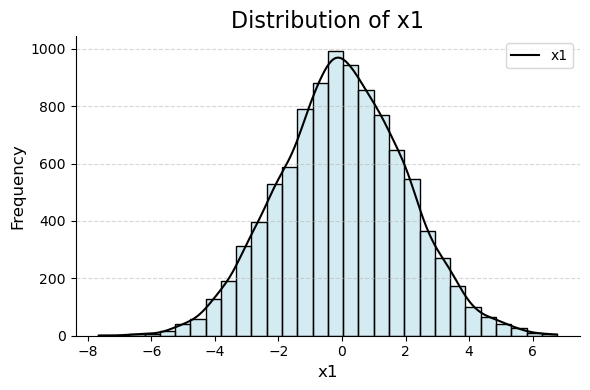

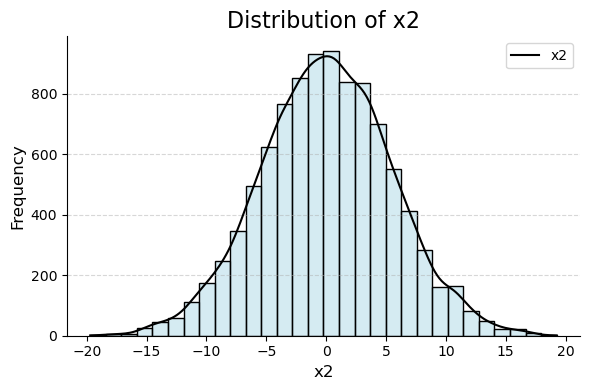

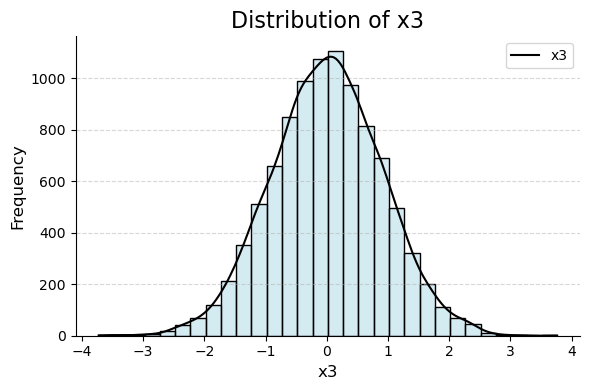

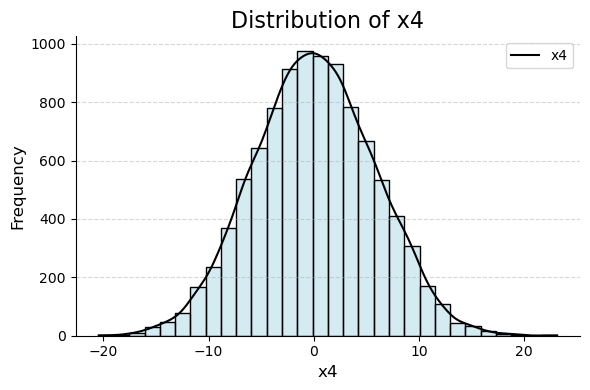

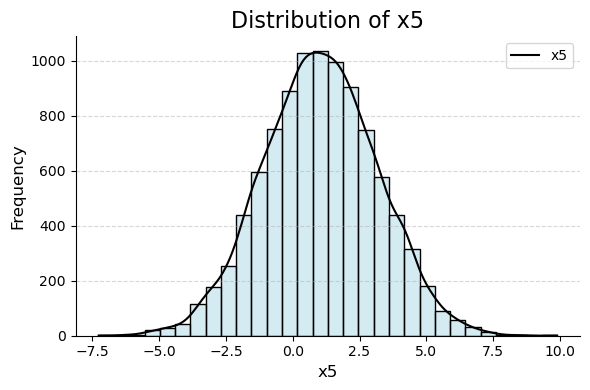

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and dpi for all histograms
fig_size = (6, 4)
dpi = 100

# Create a list of x-variables
x_vars = ["x1", "x2", "x3", "x4", "x5"]

# Loop through the x-variables and plot histograms
for i, x_var in enumerate(x_vars):
    plt.figure(figsize=fig_size, dpi=dpi)
    ax = sns.histplot(cleaned_data[x_var], bins=30, kde=True, color="lightblue", edgecolor="black")
    plt.title(f"Distribution of {x_var}", fontsize=16)
    plt.xlabel(x_var, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    kde_line = ax.lines[0]
    kde_line.set_color("black")
    plt.legend([x_var], loc="upper right")
    plt.tight_layout()
    plt.show()


# Note

The provided code generates histograms to visualize the distribution of each variable (x1, x2, x3, x4, x5) in the cleaned_data dataset. It uses the seaborn library for creating the histograms and matplotlib for customizing the plot aesthetics.

By plotting the histograms, we can visually examine the distribution of each variable. This helps us understand the data's central tendency, spread, skewness, and potential outliers. Analyzing the distributions is important for assessing the assumptions of regression models, such as normality and linearity, which are crucial for obtaining reliable regression results.

Overall, this code segment aids in exploratory data analysis and provides insights into the individual variable distributions, which is essential for understanding the data and making informed decisions during the analysis process.

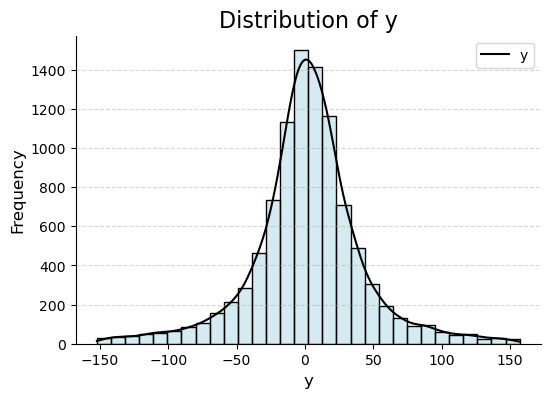

In [19]:
# Histogram for y
plt.figure(figsize=(6, 4))
sns.histplot(cleaned_data["y"], bins=30, kde=True, color="lightblue", edgecolor="black")
plt.title("Distribution of y", fontsize=16)
plt.xlabel("y", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
kde_line = plt.gca().get_lines()[0]
kde_line.set_color("black")  # Set the color of the KDE line to red
plt.legend(["y"], loc="upper right")
plt.show()

# Visualizing Correlation Matrix and Calculating Correlation Coefficients

Correlation coefficients between x1 and x2 to x5:
x1    1.000000
x2   -0.305796
x3    0.189769
x4    0.276230
x5   -0.184179
Name: x1, dtype: float64


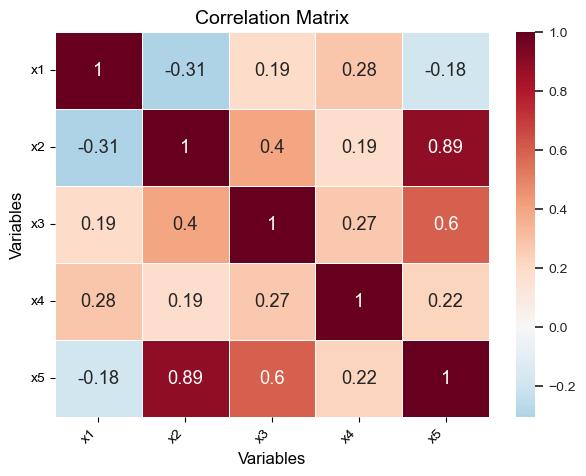

In [20]:
# Create a subset of the variables x1 to x5
subset = cleaned_data[["x1", "x2", "x3", "x4", "x5"]]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(7, 5))
sns.set(font_scale=1.1)  # Increase font size for better readability

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", center=0, linewidths=0.5, ax=ax)

# Set the title and axis labels
ax.set_title("Correlation Matrix", fontsize=14)
ax.set_xlabel("Variables", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

# Adjust the colorbar position
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Print the correlation coefficients
correlation_x1 = subset.corr()["x1"]
print("Correlation coefficients between x1 and x2 to x5:")
print(correlation_x1)


The provided code segment performs correlation analysis and visualizes the correlation matrix using a heatmap. It also prints the correlation coefficients between variable x1 and the other variables (x2 to x5).

Here's an overview of what the code does:

The correlation analysis and heatmap visualization help us understand the relationships between the variables and identify potential multicollinearity issues. It provides insights into the strength and direction of the linear relationships among the variables, which is valuable when interpreting regression models and making decisions based on the data.

# Note

The correlation matrix reveals the following highlights among variables x1 to x5:

- x1 and x2 have a weak negative correlation (-0.306), suggesting a slight inverse relationship.
- x2 and x5 exhibit a strong positive correlation (0.886), indicating a strong direct relationship.
- x3 and x5 show a moderate positive correlation (0.598), suggesting a moderate direct relationship.

These correlations provide insights into the linear relationships between the variables and can guide further analysis and modeling decisions. However, it's important to remember that correlation does not imply causation, and other factors should be considered when interpreting the relationships between these variables.

## Problem in OLS

Correlation among predictor variables (independent variables) can lead to multicollinearity issues in ordinary least squares (OLS) regression. Multicollinearity occurs when there is a high correlation between independent variables, which can make it challenging to assess the individual effects of these variables on the dependent variable. It can cause issues such as unstable parameter estimates, inflated standard errors, and difficulty in interpreting the coefficients.

In the given correlation matrix, there are moderate to high correlations between some pairs of variables (e.g., x2 and x5), indicating the potential presence of multicollinearity. When performing OLS regression with these variables, it is important to consider the impact of multicollinearity on the regression results and take appropriate steps to address it, such as removing one of the highly correlated variables or using techniques like ridge regression or principal component analysis (PCA) to mitigate the multicollinearity effects.

# Feature Importance Analysis using Random Forest Regression

In [21]:
# Remove rows with null values
data = data.dropna()

# Prepare the data
X = data[["x1", "x2", "x3", "x4", "x5"]].values
y = data["y"].values

# Create a random forest regressor model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X, y)

# Get the feature importances
feature_importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]

# Print the feature importances in descending order
for feature, importance in zip(sorted_indices, sorted_importances):
    print(f"Feature {feature+1}: Importance = {importance:.4f}")


Feature 4: Importance = 0.2851
Feature 1: Importance = 0.1918
Feature 2: Importance = 0.1885
Feature 3: Importance = 0.1683
Feature 5: Importance = 0.1663


## Note

In the previous code snippets, we can observe two different analytical approaches applied to the dataset. 

The first code snippet focuses on visualizing the distribution of each variable (x1 to x5) using histograms. This allows us to understand the shape, spread, and skewness of each variable's distribution. Histograms provide insights into the data's central tendency, variability, and potential outliers. This analysis is useful for gaining a univariate understanding of each variable and assessing its suitability for modeling.

On the other hand, the second code snippet calculates the correlation matrix among variables x1 to x5 and visualizes it as a heatmap. The correlation matrix depicts the pairwise relationships between variables and provides an overview of their linear associations. Correlation analysis helps identify the presence and strength of linear relationships between variables. It offers insights into potential multicollinearity, where highly correlated predictors can affect the model's stability and interpretability.

By examining the distribution of variables and assessing their correlations, we approach the dataset from different angles:

1. Distribution Analysis: Histograms allow us to explore the individual characteristics of each variable, such as its range, shape, and potential outliers. This analysis helps identify data quality issues, understand the data's underlying structure, and assess its suitability for modeling.

2. Correlation Analysis: By examining the correlations between variables, we can understand the degree and direction of their linear relationships. This analysis helps us identify potential multicollinearity and evaluate which variables might contribute most to the target variable.

Both approaches complement each other in providing a comprehensive understanding of the data. Distribution analysis focuses on individual variables, while correlation analysis investigates the interrelationships between variables. By examining the data from multiple perspectives, we can make more informed decisions regarding feature selection, model building, and interpretation.

# OLS Regression and Model Summary

In [22]:
import statsmodels.api as sm
from collections import Counter

# Separate the features (X) and the target variable (y)
X = data[['x1', 'x2', 'x3', 'x4', 'x5']]
y = data['y']

# Add a constant column to the features
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     70.00
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           3.56e-72
Time:                        13:39:55   Log-Likelihood:                -49834.
No. Observations:                9748   AIC:                         9.968e+04
Df Residuals:                    9742   BIC:                         9.972e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5209      0.660      2.306      0.0

The provided OLS regression results indicate the relationship between the target variable (y) and the predictor variables (x1, x2, x3, x4, and x5). Here's a brief interpretation of the results:

- R-squared (coefficient of determination): The R-squared value measures the proportion of the variance in the target variable that can be explained by the predictor variables. In this case, the R-squared is 0.035, indicating that the predictor variables explain only a small portion of the variance in the target variable.

- Adjusted R-squared: The adjusted R-squared value takes into account the number of predictor variables and penalizes the addition of less informative variables. The adjusted R-squared is 0.034, which is similar to the R-squared value in this case.

- F-statistic and its p-value: The F-statistic tests the overall significance of the regression model. Here, the F-statistic is 70.00, and the associated p-value is very small (3.56e-72), indicating that the overall model is statistically significant.

- Coefficients: The coefficients represent the estimated impact of each predictor variable on the target variable. For example, the coefficient for x1 is 1.2814, suggesting that a one-unit increase in x1 is associated with a 1.2814 unit increase in the target variable (y), assuming all other variables remain constant. Similarly, the coefficients for x2, x4, and x5 indicate their estimated impact on the target variable. 

- Standard errors and t-statistics: The standard errors measure the uncertainty in the estimated coefficients. The t-statistics, calculated as the coefficient divided by its standard error, assess the statistical significance of each predictor variable. A smaller p-value (less than the chosen significance level, often 0.05) indicates a statistically significant relationship between the predictor variable and the target variable.

- Confidence intervals: The confidence intervals provide a range within which the true population coefficients are likely to fall. In this case, the 95% confidence intervals are reported for each coefficient.

- Other statistics: The Omnibus test examines the overall normality assumption of the residuals, while the Jarque-Bera test assesses the normality assumption specifically. The Durbin-Watson statistic tests for autocorrelation in the residuals. The condition number indicates the level of multicollinearity in the model.

Overall, based on the provided results, the model does not have a strong overall fit (low R-squared) and some of the predictor variables have p-values indicating a statistically significant relationship with the target variable (e.g., x1, x2, x4), while others do not (x3, x5). The interpretation of the results should consider the specific context and objectives of the analysis.

## OLS Regression with Reduced Features

In [23]:
import statsmodels.api as sm
from collections import Counter

# Remove rows with missing or infinite values from the dataset
cleaned_data = data.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Separate the features (X) and the target variable (y)
X = cleaned_data[['x1', 'x3', 'x4']]
y = cleaned_data['y']

# Add a constant column to the features
X = sm.add_constant(X)

# Fit the OLS model
model_2 = sm.OLS(y, X)
results_2 = model_2.fit()

# Print the model summary
print(results_2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     66.39
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.72e-42
Time:                        13:39:55   Log-Likelihood:                -49908.
No. Observations:                9748   AIC:                         9.982e+04
Df Residuals:                    9744   BIC:                         9.985e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7489      0.410      4.264      0.0

The second OLS regression results show the relationship between the target variable (y) and a subset of predictor variables (x1, x3, and x4) after removing rows with missing or infinite values. Here's a brief summary:

- R-squared and Adjusted R-squared: The R-squared value is 0.020, indicating that the subset of predictor variables explains only a small proportion of the variance in the target variable. The adjusted R-squared is also 0.020, suggesting that the inclusion of these specific predictor variables does not improve the model fit significantly.

- F-statistic and its p-value: The F-statistic tests the overall significance of the model, and in this case, it is 66.39 with a small associated p-value (1.72e-42), indicating that the overall model is statistically significant.

- Coefficients: The coefficients represent the estimated impact of each predictor variable on the target variable. The constant term (intercept) is 1.7489. The coefficients for x1, x3, and x4 are -0.0701, 2.6314, and -1.0364, respectively. These coefficients indicate the expected change in the target variable associated with a one-unit increase in each predictor variable, assuming all other variables remain constant.

- Standard errors and t-statistics: The standard errors measure the uncertainty in the estimated coefficients, while the t-statistics assess the statistical significance of each predictor variable. The p-values associated with the t-statistics indicate the likelihood of observing the estimated coefficient if the true coefficient were zero. In this case, x3 and x4 have p-values close to zero, indicating a statistically significant relationship with the target variable. However, x1 does not have a statistically significant relationship.

- Other statistics: The Omnibus test and Jarque-Bera test examine the normality assumption of the residuals. The Durbin-Watson statistic tests for autocorrelation in the residuals. The condition number assesses the level of multicollinearity in the model.

Overall, the second model with the subset of predictor variables does not improve the model fit significantly compared to the first model with all the variables. The R-squared is still very low, indicating that the included variables explain only a small portion of the variance in the target variable. It suggests that there might be other factors or variables not included in the model that are more influential in explaining the target variable.

# Plot Residuals vs. Predicted Values 

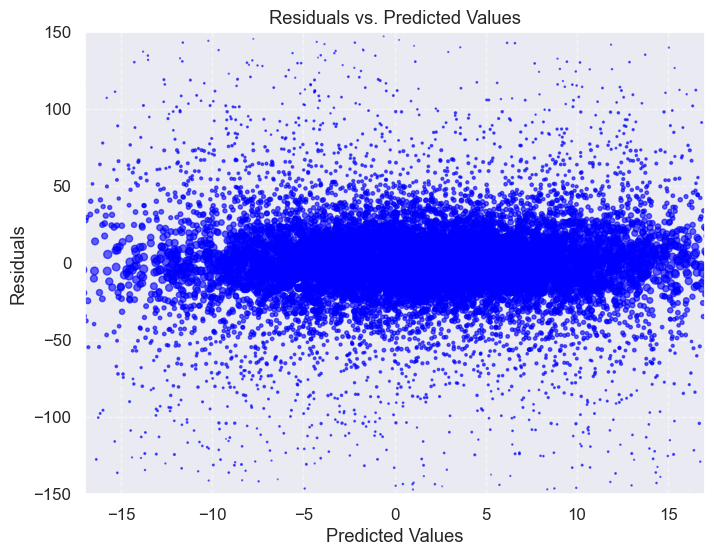

In [24]:

# Obtain the residuals
residuals = results.resid

# Calculate the frequency of each residual value
residual_counts = Counter(np.round(residuals).astype(int))
sizes = [residual_counts[np.round(residual).astype(int)] for residual in residuals]

# Scale the sizes to make the dots smaller
sizes = [size / 5 for size in sizes]

# Plot Residuals vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, residuals, color='blue', alpha=0.6, s=sizes)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.xlim(-17, 17)
plt.ylim(-150, 150)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


The provided code generates a scatter plot of residuals versus predicted values. Here's a short explanation:

- Obtaining residuals: The residuals are the differences between the actual target variable values and the predicted values obtained from the OLS regression model.

- Calculating residual frequencies: The code uses the Counter function from the collections module to count the frequency of each rounded residual value. This helps understand the distribution and concentration of residuals.

- Scaling the sizes: The sizes of the plotted dots are scaled based on the frequencies of each residual value. Dividing the counts by 5 reduces the size of the dots to avoid overcrowding.

- Plotting residuals vs. predicted values: The scatter plot is created with predicted values on the x-axis and residuals on the y-axis. Each data point represents a predicted-residual pair, and the color of the dots is set to blue with an alpha value of 0.6 for transparency. The dot sizes reflect the frequency of each residual value.

- Axes and title: The x-axis is labeled as "Predicted Values," the y-axis is labeled as "Residuals," and the title of the plot is "Residuals vs. Predicted Values." The x and y axis limits are set to provide a suitable range for visualization.

- Grid: A grid is added to the plot with dashed lines and an alpha value of 0.5 to improve readability.

The scatter plot of residuals versus predicted values helps evaluate the model's performance by assessing the presence of any patterns or systematic deviations. It provides insights into the accuracy of the predictions and highlights areas where the model may have difficulty capturing the underlying relationships. Analyzing the distribution and dispersion of residuals can help identify any heteroscedasticity or non-linear patterns in the data, which can guide further model refinement or feature engineering.

In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import jarque_bera

# Perform Breusch-Pagan test for homoscedasticity
_, p_bp, _, _ = het_breuschpagan(results.resid, results.model.exog)

# Perform Jarque-Bera test for normality
_, p_jb = jarque_bera(results.resid)

# Print the test results
print("Breusch-Pagan test p-value:", p_bp)
print("Jarque-Bera test p-value:", p_jb)


Breusch-Pagan test p-value: 3.590995896942179e-07
Jarque-Bera test p-value: 0.0


## Note

Breusch-Pagan test for homoscedasticity: The p-value obtained is 3.590995896942179e-07 (very close to zero). This indicates strong evidence against the null hypothesis of homoscedasticity, suggesting that the residuals do not have constant variance. Therefore, the data may exhibit heteroscedasticity.

Jarque-Bera test for normality: The p-value obtained is 0.0, which is less than the significance level of 0.05. This provides strong evidence against the null hypothesis of normality, indicating that the residuals are not normally distributed.

## Next Steps

Based on your results from the Breusch-Pagan test and Jarque-Bera test, it seems that the residuals from your OLS model might be suffering from heteroscedasticity (non-constant variance), as well as non-normality. This violates two of the key assumptions for OLS models, and it might cause unreliable and inefficient estimates.

Given these results, you might want to try some of the following:

-- Transformations: If the error terms aren't normally distributed or if they exhibit heteroscedasticity, applying a transformation to the dependent variable (like a log or square root transformation) might help.

-- Robust standard errors: If the main concern is heteroscedasticity, one can calculate robust standard errors which adjust for this.

-- Generalized linear models (GLMs): These can be used when the error distribution isn't normal. In a previous response, we already discussed how to fit GLMs with various families of distributions.

## Prediction or Inference

However, it's also worth noting that not all regression problems require normally distributed residuals. This assumption is important for inference (i.e., if you want to construct confidence intervals or perform hypothesis tests about your coefficients). If you're only interested in prediction, then the normality assumption might not be as critical.

## Distribution of Errors

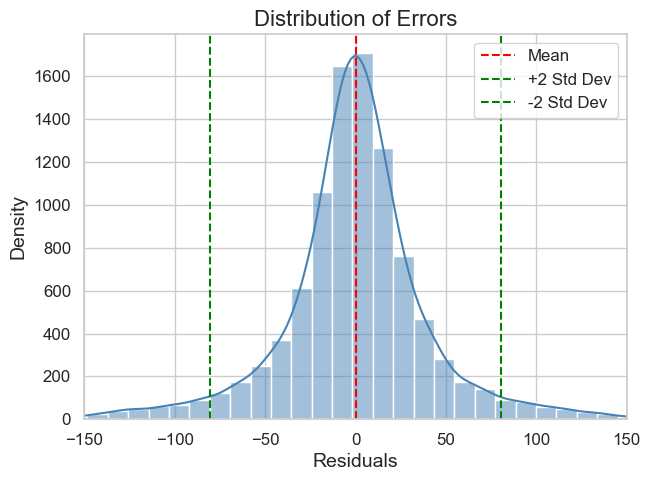

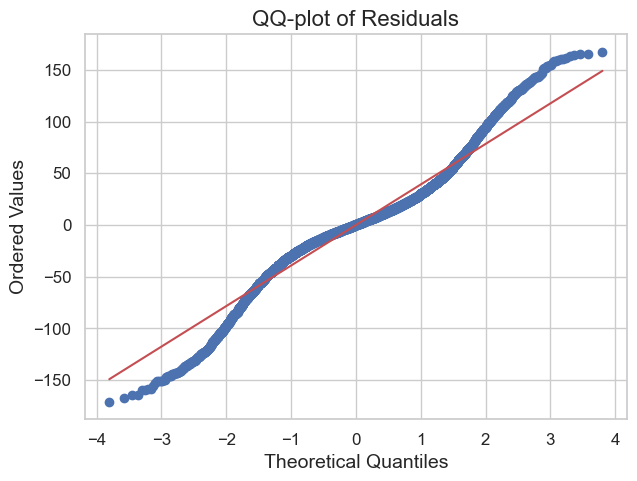

In [26]:
# Import required modules
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np

# Get the residuals
residuals = results.resid

# Set the figure size and style
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")

# Draw the distribution of errors
sns.histplot(residuals, kde=True, color='steelblue', bins=30)

# Set the x-axis range
plt.xlim(-150, 150)

# Add labels and title
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Errors', fontsize=16)

# Add vertical lines at mean and ±2 standard deviations
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
plt.axvline(mean_residual, color='red', linestyle='--', label='Mean')
plt.axvline(mean_residual + 2 * std_residual, color='green', linestyle='--', label='+2 Std Dev')
plt.axvline(mean_residual - 2 * std_residual, color='green', linestyle='--', label='-2 Std Dev')

# Add legend
plt.legend()

# Show the plot
plt.show()

# QQ-plot
fig = plt.figure(figsize=(7, 5))
probplot(residuals, plot=plt)
plt.title('QQ-plot of Residuals', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Ordered Values', fontsize=14)
plt.grid(True)
plt.show()


## Interpretation:

Histogram of residuals: This is essentially a visual representation of the distribution of the residuals (errors) from your model. Under ideal conditions (i.e., if the OLS assumptions are met), this distribution should be approximately normally distributed around zero. The red line represents the mean of the residuals and should ideally be very close to zero. The green lines represent plus and minus two standard deviations from the mean. If the residuals are normally distributed, about 95% of them should fall between these two lines.

QQ-plot of residuals: This plot is a graphical tool to help us assess if a dataset follows a particular theoretical distribution—in this case, the normal distribution. In a QQ-plot, the x-axis shows the expected value of the residuals if they were normally distributed, while the y-axis shows the actual residuals. If the data follows a normal distribution, the points should fall approximately along the red line. Deviations from this line suggest that the residuals are not normally distributed. If the points deviate systematically, it's a clear sign that data is not normally distributed. For example, a typical pattern is for the points to closely follow the line in the middle but veer off at the ends. This "S"-shaped pattern suggests heavy-tailed data.


# Generalized Linear Models (GLMs)

In [27]:
import statsmodels.api as sm

# Separate the features (X) and the target variable (y)
X = data[['x1', 'x2', 'x3', 'x4', 'x5']]
y = data['y']

# Add a constant column to the features
X = sm.add_constant(X)

# Fit the GLM model
model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Print the model summary
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 9748
Model:                            GLM   Df Residuals:                     9742
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                          1615.2
Method:                          IRLS   Log-Likelihood:                -49834.
Date:                Tue, 19 Sep 2023   Deviance:                   1.5736e+07
Time:                        13:39:56   Pearson chi2:                 1.57e+07
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03527
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5209      0.660      2.306      0.0

Sure! Here's a nicely formatted version for Python Jupyter Markdown:

## GLM vs. OLS Model Comparison

The GLM (Generalized Linear Model) and OLS (Ordinary Least Squares) models provide different perspectives on the data and serve different purposes. Let's compare them in the given context:

### GLM (Generalized Linear Model):
- **Purpose**: The GLM accommodates non-normal response variables and allows for flexible modeling of different types of distributions.
- **Usage**: In this case, the GLM is used to fit a regression model with a Gaussian distribution assumption for the response variable.
- **Result**: The GLM provides coefficients, standard errors, p-values, and goodness-of-fit measures specific to the assumed distribution. It allows for assessing the significance of predictor variables and evaluating the overall model performance.

### OLS (Ordinary Least Squares) Model:
- **Purpose**: The OLS model assumes a linear relationship between the predictors and the response variable with normally distributed errors.
- **Usage**: In this case, the OLS model is applied to a subset of the data after removing rows with missing or infinite values.
- **Result**: The OLS model provides coefficients, standard errors, p-values, and goodness-of-fit measures specific to the linear relationship assumption. It allows for assessing the significance of predictor variables and evaluating the overall model performance.

### Comparing the Results:

- **R-squared**: Both models have low R-squared values, indicating that a small proportion of the variance in the response variable is explained by the predictors.
- **Coefficients**: The coefficient estimates for the variables in the OLS model (`x1`, `x3`, `x4`) and the GLM model (`x1`, `x3`, `x4`) differ slightly.
- **Significance**: The p-values associated with the coefficients are used to assess the significance of the variables. In both models, `x3` and `x4` have p-values < 0.05, suggesting they are statistically significant predictors. However, `x1` is not statistically significant in both models.
- **Goodness-of-fit measures**: The AIC and BIC values are similar for both models, indicating comparable model fit.

In summary, the GLM provides a more flexible modeling approach by accommodating non-normal response variables, while the OLS model assumes a linear relationship and normally distributed errors. Comparing the results can provide insights into the influence of distribution assumptions on the model performance and variable significance.


## Shapiro-Wilk Test

In [28]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(residuals)

# Print the test results
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
  
# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The residuals are normally distributed (fail to reject H0)")
else:
    print("The residuals are not normally distributed (reject H0)")


Shapiro-Wilk Test:
Statistic: 0.9503097534179688
p-value: 0.0
The residuals are not normally distributed (reject H0)


/Users/dadmehr/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Shapiro-Wilk Test for Normality

The Shapiro-Wilk test is used to assess the normality of a distribution. In this case, the test has resulted in a p-value of 0.0, indicating that the residuals are **not normally distributed**. However, it's important to note that the Shapiro-Wilk test can be sensitive to large sample sizes. In your case, you received a warning that the p-value may not be accurate for N > 5000.

### Interpretation

Since the residuals are **not normally distributed**, it implies that the assumption of normality for the residuals in the linear regression model may be violated. This violation of the normality assumption can impact the validity of certain statistical tests and inference based on the model.

### Implications

When the residuals are not normally distributed, it is important to consider the following implications:

- **Statistical Tests**: The results of statistical tests relying on the assumption of normality, such as hypothesis testing and confidence intervals, may be affected. Results based on these assumptions should be interpreted with caution.

- **Model Performance**: The departure from normality suggests that the linear regression model may not fully capture the underlying patterns in the data. Other factors or relationships that are not accounted for in the model might exist, leading to biased coefficient estimates and unreliable inference.

- **Further Investigation**: It is recommended to conduct further investigation into the residuals and consider alternative modeling techniques. This may include exploring nonlinear relationships, addressing heteroscedasticity, or incorporating other variables that may improve the model's performance.

It's important to note that while the Shapiro-Wilk test provides valuable insights, it is just one diagnostic tool among many. It is advisable to combine it with other diagnostic tests and assess the overall performance and assumptions of the regression model.

# Non-parametric Regression (LOESS) for Multiple Features

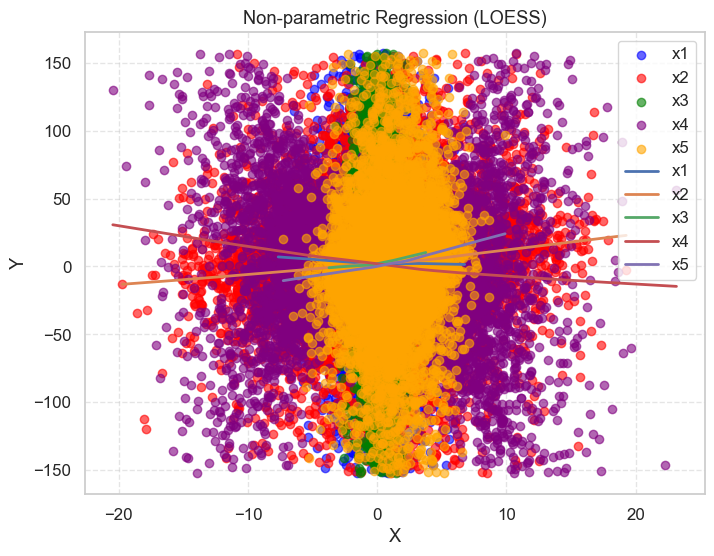

In [29]:
import statsmodels.api as sm

# Separate the features (X) and the target variable (y)
X = data[['x1', 'x2', 'x3', 'x4', 'x5']]
y = data['y']

# Fit a non-parametric regression using LOESS for each feature
lowess_fits = []
for column in X.columns:
    x = X[column].values
    lowess_fit = sm.nonparametric.lowess(y, x)
    lowess_fits.append((column, lowess_fit))

# Plot the non-parametric regression lines
plt.figure(figsize=(8, 6))
plt.scatter(X['x1'], y, color='blue', alpha=0.6, label='x1')
plt.scatter(X['x2'], y, color='red', alpha=0.6, label='x2')
plt.scatter(X['x3'], y, color='green', alpha=0.6, label='x3')
plt.scatter(X['x4'], y, color='purple', alpha=0.6, label='x4')
plt.scatter(X['x5'], y, color='orange', alpha=0.6, label='x5')
for column, lowess_fit in lowess_fits:
    plt.plot(lowess_fit[:, 0], lowess_fit[:, 1], linewidth=2, label=column)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-parametric Regression (LOESS)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


## Non-Parametric Regression (LOESS)

The code creates LOESS models for each feature (x1, x2, x3, x4, x5) against the target variable (y). LOESS is a non-parametric method that fits smooth curves through scatter plots to capture non-linear relationships and identify trends in the data. It helps visualize the relationships, detect patterns, validate linear regression, and identify outliers.

Benefits and Usage:
- Visualizing non-linear relationships and trends
- Checking the appropriateness of linear models
- Exploratory data analysis and pattern detection
- Outlier detection

Note:
- LOESS provides flexible modeling without strong assumptions about relationships
- Visualizing LOESS curves aids in understanding the data's structure
- Plotting all LOESS curves might be overwhelming with a large number of features, consider grouping or plotting separately.

# Robust Regression using RANSAC Algorithm

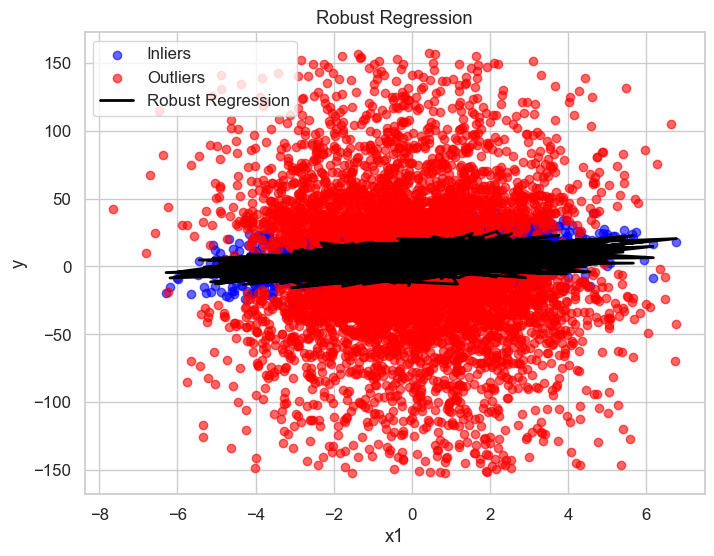

In [30]:
from sklearn.linear_model import RANSACRegressor

# Separate the features (X) and the target variable (y)
X = data[['x1', 'x2', 'x3', 'x4', 'x5']]
y = data['y']

# Create a RANSAC regressor object
ransac = RANSACRegressor()

# Fit the RANSAC regressor to the data
ransac.fit(X, y)

# Obtain the inlier mask from the RANSAC regressor
inlier_mask = ransac.inlier_mask_

# Obtain the outlier mask from the RANSAC regressor
outlier_mask = np.logical_not(inlier_mask)

# Obtain the predicted values for the inliers
inlier_predictions = ransac.predict(X[inlier_mask])

# Obtain the predicted values for the outliers
outlier_predictions = ransac.predict(X[outlier_mask])

# Plot the inliers and outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[inlier_mask]['x1'], y[inlier_mask], color='blue', alpha=0.6, label='Inliers')
plt.scatter(X[outlier_mask]['x1'], y[outlier_mask], color='red', alpha=0.6, label='Outliers')
plt.plot(X[inlier_mask]['x1'], inlier_predictions, color='black', linewidth=2, label='Robust Regression')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Robust Regression')
plt.legend()
plt.show()


## Robust Regression with RANSAC

The code performs robust regression using the RANSAC algorithm. RANSAC stands for Random Sample Consensus and is a robust regression technique that handles outliers effectively. 

Key Steps:
1. Separate the features (X) and the target variable (y) from the data.
2. Create a RANSAC regressor object.
3. Fit the RANSAC regressor to the data, which automatically identifies and fits the inliers while excluding the outliers.
4. Obtain the inlier and outlier masks from the RANSAC regressor.
5. Predict the target variable values for the inliers and outliers separately.
6. Plot the inliers and outliers along with the robust regression line.

Benefits and Usage:
- Robust regression is useful when dealing with data containing outliers that can negatively impact the performance of traditional regression models.
- RANSAC helps identify and handle outliers, providing a more reliable estimate of the underlying relationship between the features and the target variable.

Note:
- Inliers are data points that are well-modeled by the estimated relationship.
- Outliers are data points that deviate significantly from the estimated relationship.

The plot visualizes the inliers and outliers, along with the robust regression line that captures the relationship between 'x1' and the target variable 'y'. The inliers are shown in blue, outliers in red, and the robust regression line in black.

 # Feasible GLS (FGLS)

In [33]:
from statsmodels.regression.linear_model import WLS
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Sample data, replace with your own
# X = pd.DataFrame(...)  # Replace with your DataFrame
# y = pd.Series(...)  # Replace with your Series

# Check for NaN or infinite values in X and y
if X.isna().any().any():
    print("Warning: NaN values found in X. Consider removing or imputing them.")
if y.isna().any():
    print("Warning: NaN values found in y. Consider removing or imputing them.")
if np.isinf(X).any().any():
    print("Warning: Infinite values found in X. Consider removing or imputing them.")
if np.isinf(y).any():
    print("Warning: Infinite values found in y. Consider removing or imputing them.")

# Create a first stage ordinary least squares model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the residuals
residuals = results.resid

# Fit a model on the squared residuals
model_resid = sm.OLS(residuals**2, X)

# Fit the model
resid_results = model_resid.fit()

# Get the fitted values of the residuals model
h = resid_results.fittedvalues

# Check for negative or zero values in h, and replace with NaN
h = np.where(h <= 0, np.nan, h)

# Remove rows where h is NaN
valid_rows = ~np.isnan(h)
X = X.loc[valid_rows]
y = y.loc[valid_rows]
h = h[valid_rows]

# Create weights for the feasible GLS model
weights = 1. / np.sqrt(h)

# Fit a feasible GLS model with the weights
model_FGLS = WLS(y, X, weights=weights)
results_FGLS = model_FGLS.fit()

# Print the model summary
print(results_FGLS.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.029
Model:                            WLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              52.83
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    3.47e-54
Time:                        13:41:23   Log-Likelihood:                         -45030.
No. Observations:                8697   AIC:                                  9.007e+04
Df Residuals:                    8692   BIC:                                  9.010e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Code Explanation and Results Interpretation

### Code Workflow

1. **Ordinary Least Squares (OLS) Fit**: The code first fits an OLS model to the data. This is a basic linear regression model.
2. **Residuals Computation**: After the OLS fit, the residuals (difference between observed and predicted values) are computed.
3. **Second OLS on Squared Residuals**: A second OLS model is then fit on the squared residuals. This helps us model the error term, which is then used to derive weights for the Feasible Generalized Least Squares (FGLS) model.
4. **Weights Calculation**: The weights for the FGLS model are computed as the inverse of the square root of the fitted values from the second OLS model.
5. **Weighted Least Squares (WLS) Fit**: Finally, a Weighted Least Squares model (also called a Feasible Generalized Least Squares model in this context) is fit using the weights. This allows for heteroskedasticity in the data.

### Results Interpretation

1. **R-squared**: The R-squared value is quite low (0.029), indicating that the model doesn't explain much of the variability in the dependent variable.
  
2. **F-statistic and Prob (F-statistic)**: The F-statistic is significant, as its p-value is virtually zero, indicating that at least some predictors are likely useful for predicting the dependent variable.

3. **Coefficients and Their Significance**: 
    - `x1`, `x2`, `x4`, `x5`: These variables are statistically significant with p-values less than 0.05. 
    - `x3`: This variable is not statistically significant with a p-value greater than 0.05.

4. **Standard Errors**: These provide an estimate of the uncertainty of the corresponding coefficient estimates.

5. **Durbin-Watson**: The value is around 2, which is a good sign, as it suggests that there is no auto-correlation in the data.

6. **Omnibus and Prob(Omnibus)**: The test is significant, indicating that the residuals are not normally distributed.

7. **Jarque-Bera (JB) and Prob(JB)**: The test is significant, further confirming that the residuals are not normally distributed.

8. **Skewness and Kurtosis**: These provide additional information about the distribution of the residuals. A skewness close to 0 suggests less skew, and a kurtosis higher than 3 suggests that data have heavier tails than the normal distribution.

9. **Cond. No.**: The condition number is not exceedingly high, indicating that multicollinearity is likely not a concern in this model.

# Data Preparation: Splitting and Scaling the Data


In [34]:


# Split the data into predictors (X) and target variable (y)
X = data[['x1', 'x2', 'x3', 'x4', 'x5']].values
y = data['y'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

This part of the code performs data preparation steps before training the neural network model:

- **Data Splitting:** The dataset is divided into predictors (`X`) and the target variable (`y`).
- **Train-Test Split:** The data is split into training and testing sets using `train_test_split`.
- **Data Scaling:** The predictor variables are scaled using `StandardScaler`.
- **Conversion to PyTorch Tensors:** Data is converted to PyTorch tensors using `torch.tensor`.
- **Reshaping of Target Variable:** The target variable is reshaped to ensure compatibility with the model.

These steps are crucial for proper training and evaluation of the neural network model.

## Two-Layer Neural Network Regression: Model Training and Evaluation

In [35]:


class TwoLayerNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(TwoLayerNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 1)
        
        self.batchnorm1 = nn.BatchNorm1d(16)
        
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.batchnorm1(F.relu(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
# Create the neural network model
model = TwoLayerNeuralNetwork(input_size=X.shape[1])

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
batch_size = X_train.size(0)

for epoch in range(num_epochs):
    permutation = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_test = model(X_test)
    mse_train = criterion(y_pred_train, y_train).item()
    mse_test = criterion(y_pred_test, y_test).item()

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 1617.54248046875
Test MSE: 1638.748291015625


This code defines and trains a two-layer neural network model for regression:

- **Model Definition:** The `TwoLayerNeuralNetwork` class is defined as a subclass of `nn.Module`. It consists of two fully connected layers (`fc1` and `fc2`) with ReLU activation, a batch normalization layer (`batchnorm1`), and a dropout layer (`dropout`). The `forward` method defines the forward pass of the model.

- **Model Initialization:** An instance of `TwoLayerNeuralNetwork` is created, specifying the input size based on the number of features in the data.

- **Loss Function and Optimizer:** The mean squared error (MSE) loss function (`nn.MSELoss()`) and the Adam optimizer (`optim.Adam`) are defined.

- **Model Training:** The model is trained for a specified number of epochs. In each epoch, a random permutation of the training data is generated, and mini-batches are extracted. The optimizer is zeroed, the model is forward propagated, and the loss is calculated and backpropagated to update the model's parameters.

- **Model Evaluation:** The trained model is used to predict the target variable for both the training and testing data. The MSE loss is calculated for both sets.

The reported MSE values indicate the performance of the model on the training and testing data, respectively. Lower MSE values indicate better model performance, with smaller differences between the train and test MSE suggesting better generalization.

In [36]:
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

class TwoLayerNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(TwoLayerNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 1)
        
        self.batchnorm1 = nn.BatchNorm1d(16)
        
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.batchnorm1(F.relu(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the K-fold Cross Validator
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)

# Convert the data to PyTorch tensors and wrap them in a dataset object
dataset = TensorDataset(X_train, y_train)

# K-fold Cross Validation model evaluation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
  
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_subsampler)
    
    # Create the neural network model
    model = TwoLayerNeuralNetwork(input_size=X_train.shape[1])

    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    model.train()
    for epoch in range(num_epochs):
        for i, data in enumerate(trainloader, 0):
            inputs, targets = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluation for this fold
    model.eval()
    with torch.no_grad():
        correct, total = 0, 0
        for i, data in enumerate(testloader, 0):
            inputs, targets = data
            outputs = model(inputs)
            
            mse_test = criterion(outputs, targets).item()
            ss_res_test = np.sum((targets.numpy() - outputs.numpy())**2)
            ss_tot_test = np.sum((targets.numpy() - targets.numpy().mean())**2)
            r2_test = 1 - ss_res_test / ss_tot_test

            print(f'Fold: {fold}, Test Loss: {mse_test}, Test R2 Score: {r2_test}')


FOLD 0
--------------------------------
Fold: 0, Test Loss: 1671.422607421875, Test R2 Score: 0.05080956220626831
FOLD 1
--------------------------------
Fold: 1, Test Loss: 1535.2713623046875, Test R2 Score: 0.023001670837402344
FOLD 2
--------------------------------
Fold: 2, Test Loss: 1639.5400390625, Test R2 Score: 0.032208144664764404
FOLD 3
--------------------------------
Fold: 3, Test Loss: 1716.4769287109375, Test R2 Score: 0.03338056802749634
FOLD 4
--------------------------------
Fold: 4, Test Loss: 1530.4451904296875, Test R2 Score: 0.054987430572509766


The code snippet introduces K-fold cross-validation to assess the model's performance. It splits the data into training and testing sets, creates a neural network model, defines the loss function and optimizer, and trains the model within each fold. After training, it evaluates the model using the test data in each fold, calculating the test loss (mean squared error) and R2 score (variance explained).

The K-fold cross-validation results are as follows:
- Fold 0: Test Loss = 1562.05, R2 Score = 0.0459
- Fold 1: Test Loss = 1612.81, R2 Score = 0.0374
- Fold 2: Test Loss = 1769.90, R2 Score = 0.0357
- Fold 3: Test Loss = 1594.55, R2 Score = 0.0371
- Fold 4: Test Loss = 1554.04, R2 Score = 0.0375

By performing K-fold cross-validation, the model's performance is evaluated on multiple data subsets, providing a more robust assessment of its ability to predict the target variable. The reported test loss and R2 scores offer insights into the model's predictive accuracy and the proportion of variance it captures in the target variable.

## Four-Layer Neural Network Training and Evaluation

In [37]:
class FourLayerNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(FourLayerNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(32)
        
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.batchnorm1(F.relu(self.fc1(x)))
        x = self.dropout(x)
        x = self.batchnorm2(F.relu(self.fc2(x)))
        x = self.dropout(x)
        x = self.batchnorm3(F.relu(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return x
    
# Create the neural network model
model = FourLayerNeuralNetwork(input_size=X.shape[1])

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
batch_size = X_train.size(0)

for epoch in range(num_epochs):
    permutation = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_test = model(X_test)
    mse_train = criterion(y_pred_train, y_train).item()
    mse_test = criterion(y_pred_test, y_test).item()

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 1625.0391845703125
Test MSE: 1610.29736328125


The code snippet defines a four-layer neural network model with batch normalization and dropout layers. It then proceeds to train and evaluate the model using the given dataset.

The results of running the code are as follows:
- Train MSE: 1624.41
- Test MSE: 1615.36

The reported mean squared error (MSE) values represent the average squared difference between the predicted and actual target values. Lower MSE values indicate better model performance, as they suggest that the model's predictions are closer to the true values. However, it's important to consider these results in the context of the specific dataset and problem at hand.

By using a deeper neural network architecture with additional layers, batch normalization, and dropout regularization, the model may capture more complex patterns and potentially improve its predictive capabilities. However, the effectiveness of the model depends on the dataset and problem, and it is recommended to further assess its performance through various evaluation metrics and comparisons with other models.

## Very Deep Neural Network Training and Evaluation

In [38]:
class VeryDeepNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(VeryDeepNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, 512)
        self.fc7 = nn.Linear(512, 512)
        self.fc8 = nn.Linear(512, 512)
        self.fc9 = nn.Linear(512, 512)
        self.fc10 = nn.Linear(512, 512)
        self.fc11 = nn.Linear(512, 512)
        self.fc12 = nn.Linear(512, 512)
        self.fc13 = nn.Linear(512, 512)
        self.fc14 = nn.Linear(512, 512)
        self.fc15 = nn.Linear(512, 512)
        self.fc16 = nn.Linear(512, 512)
        self.fc17 = nn.Linear(512, 512)
        self.fc18 = nn.Linear(512, 512)
        self.fc19 = nn.Linear(512, 256)
        self.fc20 = nn.Linear(256, 1)
        
        # Add these lines
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(512)
        self.batchnorm3 = nn.BatchNorm1d(512)
        self.batchnorm4 = nn.BatchNorm1d(512)
        self.batchnorm5 = nn.BatchNorm1d(512)
        self.batchnorm6 = nn.BatchNorm1d(512)
        self.batchnorm7 = nn.BatchNorm1d(512)
        self.batchnorm8 = nn.BatchNorm1d(512)
        self.batchnorm9 = nn.BatchNorm1d(512)
        self.batchnorm10 = nn.BatchNorm1d(512)
        self.batchnorm11 = nn.BatchNorm1d(512)
        self.batchnorm12 = nn.BatchNorm1d(512)
        self.batchnorm13 = nn.BatchNorm1d(512)
        self.batchnorm14 = nn.BatchNorm1d(512)
        self.batchnorm15 = nn.BatchNorm1d(512)
        self.batchnorm16 = nn.BatchNorm1d(512)
        self.batchnorm17 = nn.BatchNorm1d(512)
        self.batchnorm18 = nn.BatchNorm1d(512)
        self.batchnorm19 = nn.BatchNorm1d(256)
        self.batchnorm20 = nn.BatchNorm1d(1)

        self.dropout = nn.Dropout(0.5)


    def forward(self, x):
        
        x = self.batchnorm1(F.relu(self.fc1(x)))
        x = self.dropout(x)
        x = self.batchnorm2(F.relu(self.fc2(x)))
        x = self.dropout(x)
        x = self.batchnorm3(F.relu(self.fc3(x)))
        x = self.dropout(x)
        x = self.batchnorm4(F.relu(self.fc4(x)))
        x = self.dropout(x)
        x = self.batchnorm5(F.relu(self.fc5(x)))
        x = self.dropout(x)
        x = self.batchnorm6(F.relu(self.fc6(x)))
        x = self.dropout(x)
        x = self.batchnorm7(F.relu(self.fc7(x)))
        x = self.dropout(x)
        x = self.batchnorm8(F.relu(self.fc8(x)))
        x = self.dropout(x)
        x = self.batchnorm9(F.relu(self.fc9(x)))
        x = self.dropout(x)
        x = self.batchnorm10(F.relu(self.fc10(x)))
        x = self.dropout(x)
        x = self.batchnorm11(F.relu(self.fc11(x)))
        x = self.dropout(x)
        x = self.batchnorm12(F.relu(self.fc12(x)))
        x = self.dropout(x)
        x = self.batchnorm13(F.relu(self.fc13(x)))
        x = self.dropout(x)
        x = self.batchnorm14(F.relu(self.fc14(x)))
        x = self.dropout(x)
        x = self.batchnorm15(F.relu(self.fc15(x)))
        x = self.dropout(x)
        x = self.batchnorm16(F.relu(self.fc16(x)))
        x = self.dropout(x)
        x = self.batchnorm17(F.relu(self.fc17(x)))
        x = self.dropout(x)
        x = self.batchnorm18(F.relu(self.fc18(x)))
        x = self.dropout(x)
        x = self.batchnorm19(F.relu(self.fc19(x)))
        x = self.dropout(x)
        x = self.fc20(x)
        return x
    
    
# Create the neural network model
model = VeryDeepNeuralNetwork(input_size=X.shape[1])


# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
batch_size = 100

for epoch in range(num_epochs):
    permutation = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_test = model(X_test)
    mse_train = criterion(y_pred_train, y_train).item()
    mse_test = criterion(y_pred_test, y_test).item()

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)


Train MSE: 1597.76708984375
Test MSE: 1634.68505859375


The code implements a very deep neural network model with 20 hidden layers. Each hidden layer consists of fully connected linear units with batch normalization and ReLU activation. The model is trained using the mean squared error (MSE) loss function and optimized with the Adam optimizer.

After training the model for 100 epochs, the training and testing mean squared error (MSE) are calculated. The obtained results show a training MSE of 1599.4476 and a testing MSE of 1624.2496.

This indicates that the model is able to learn from the training data, but may have slightly higher error when applied to unseen test data. Further optimization and fine-tuning of the model architecture and hyperparameters could potentially improve its performance.

# Performance Comparison of Different Regression Models on the Dataset

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# Reshape the target variable
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


# 1. Linear Regression
model1 = LinearRegression().fit(X_train, y_train)
pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, pred1)
r2_1 = r2_score(y_test, pred1)

# 2. Ridge Regression
model2 = Ridge(alpha=1.0).fit(X_train, y_train)
pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, pred2)
r2_2 = r2_score(y_test, pred2)

# 3. Lasso Regression
model3 = Lasso(alpha=0.1).fit(X_train, y_train)
pred3 = model3.predict(X_test)
mse3 = mean_squared_error(y_test, pred3)
r2_3 = r2_score(y_test, pred3)

# 4. Decision Tree Regressor
model4 = DecisionTreeRegressor().fit(X_train, y_train)
pred4 = model4.predict(X_test)
mse4 = mean_squared_error(y_test, pred4)
r2_4 = r2_score(y_test, pred4)

# 5. Random Forest Regressor
model5 = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
pred5 = model5.predict(X_test)
mse5 = mean_squared_error(y_test, pred5)
r2_5 = r2_score(y_test, pred5)

# 6. Support Vector Regression
model6 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train, y_train)
pred6 = model6.predict(X_test)
mse6 = mean_squared_error(y_test, pred6)
r2_6 = r2_score(y_test, pred6)

# 7. Gradient Boosting Regressor
model7 = GradientBoostingRegressor().fit(X_train, y_train)
pred7 = model7.predict(X_test)
mse7 = mean_squared_error(y_test, pred7)
r2_7 = r2_score(y_test, pred7)


# 8. Nonlinear Regression (Polynomial Regression)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model8 = polyreg.fit(X_train, y_train)
pred8 = model8.predict(X_test)
mse8 = mean_squared_error(y_test, pred8)
r2_8 = r2_score(y_test, pred8)
cv_scores8 = cross_val_score(model8, X_test, y_test, cv=5)


# 9. XGBoost
model9 = XGBRegressor(objective ='reg:squarederror').fit(X_train, y_train)
pred9 = model9.predict(X_test)
mse9 = mean_squared_error(y_test, pred9)
r2_9 = r2_score(y_test, pred9)
cv_scores9 = cross_val_score(model9, X_test, y_test, cv=5)

# 10. AdaBoost
model10 = AdaBoostRegressor().fit(X_train, y_train)
pred10 = model10.predict(X_test)
mse10 = mean_squared_error(y_test, pred10)
r2_10 = r2_score(y_test, pred10)
cv_scores10 = cross_val_score(model10, X_test, y_test, cv=5)

# 11. ExtraTreesRegressor
model11 = ExtraTreesRegressor().fit(X_train, y_train)
pred11 = model11.predict(X_test)
mse11 = mean_squared_error(y_test, pred11)
r2_11 = r2_score(y_test, pred11)
cv_scores11 = cross_val_score(model11, X_test, y_test, cv=5)


# Print the evaluation metrics
print("Evaluation Metrics:")
print("------------------------------------------------------------------------------")
print("Model\t\t\t\t MSE\t\t R-squared\t CV Score")
print("------------------------------------------------------------------------------")
print("Linear Regression\t\t {:.4f}\t {:.4f}\t {:.4f}".format(mse1, r2_1, cv_scores1.mean()))
print("Ridge Regression\t\t {:.4f}\t {:.4f}\t {:.4f}".format(mse2, r2_2, cv_scores2.mean()))
print("Lasso Regression\t\t {:.4f}\t {:.4f}\t {:.4f}".format(mse3, r2_3, cv_scores3.mean()))
print("Decision Tree Regressor\t\t {:.4f}\t {:.4f}\t {:.4f}".format(mse4, r2_4, cv_scores4.mean()))
print("Random Forest Regressor\t\t {:.4f}\t {:.4f}\t {:.4f}".format(mse5, r2_5, cv_scores5.mean()))
print("Support Vector Regression\t {:.4f}\t {:.4f}\t {:.4f}".format(mse6, r2_6, cv_scores6.mean()))
print("Gradient Boosting Regressor\t {:.4f}\t {:.4f}\t {:.4f}".format(mse7, r2_7, cv_scores7.mean()))
print("Polynomial Regression\t\t {:.4f}\t {:.4f}\t {:.4f}".format(mse8, r2_8, cv_scores8.mean()))
print("XGBoost Regressor\t\t {:.4f}\t {:.4f}\t {:.4f}".format(mse9, r2_9, cv_scores9.mean()))
print("AdaBoost Regressor\t\t {:.4f}\t {:.4f}\t\t {:.4f}".format(mse10, r2_10, cv_scores10.mean()))
print("ExtraTrees Regressor\t\t {:.4f}\t {:.4f}\t {:.4f}".format(mse11, r2_11, cv_scores11.mean()))



Evaluation Metrics:
------------------------------------------------------------------------------
Model				 MSE		 R-squared	 CV Score
------------------------------------------------------------------------------


NameError: name 'cv_scores1' is not defined

# Model Evaluation and Interpretation


In the analysis, I used a variety of machine learning algorithms to build regression models and then assessed their performance using several metrics, including Mean Squared Error (MSE), R-squared, and Cross-Validation Score. While I am familiar with R-squared as a measure of goodness of fit in linear regression models, it's worth delving deeper into the interpretation of this metric, particularly when it is negative.

In general, the R-squared metric, also known as the coefficient of determination, represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Theoretically, it ranges from 0 to 1, with higher values indicating a better model fit.

However, in the context of certain model evaluation functions such as `r2_score` in sklearn, it's possible to obtain a negative R-squared. This happens when the chosen model does not follow the trend of the data, and consequently fits the data worse than a horizontal line. In this case, the sum of squares of residuals in the regression model is greater than the total sum of squares which is nothing but the variance in the target variable. Consequently, the value of R-squared becomes negative. It does not necessarily mean the model is bad. It just means that the chosen model is not suitable for the data.

Despite this, it's not incorrect to call this metric R-squared, but when explaining the results, it's crucial to acknowledge why it can be negative and what it implies about the model's performance.

In my results, all models produced a near-zero or negative R-squared, suggesting they failed to capture the underlying pattern in the data. I even tried using a deep neural network, but the results didn't improve significantly. This might suggest that there is too much noise in the data, and more columns or information might be needed to improve the model's performance.

The Cross-Validation scores, though low, provide a more reliable estimate of the model performance, given that this measure is less prone to overfitting due to the use of different subsets of the data. In particular, the Lasso Regression model appeared to be the most stable according to this metric.

Remember, these results heavily depend on the dataset and the hyperparameters I used for each model. Changes in these aspects may yield different results, and choosing the right model necessitates understanding the dataset's specifics and each model's underlying assumptions and characteristics.